In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def load_data(data_path, mic_path, figure_path):
    raw_data = pd.read_csv(data_path)

    raw_data = raw_data.drop(raw_data[raw_data["output"].isna()].index)

    raw_data["time_steps"] = raw_data["time_steps"].astype(int) #.astype(str)
    print(raw_data.time_steps.unique())

    relation_data = pd.read_csv(mic_path)
    relation_data.columns = ["time_steps", 'output',"MIC", "CS", "DC", "PC", "SC", "KC"]
    relation_data.set_index(["output", "time_steps"], inplace=True)
    print(list(raw_data["output"].unique()))
    return raw_data, relation_data

[11 12  5  7  9  6  8 10  1  3  2  4]
['WT', 'pH', 'DO', 'COD', 'BOD', 'AN', 'TP']
[ 3  1  4  2 10  9  5  7  6  8 12 11]
['pH', 'DO', 'COD', 'BOD', 'AN', 'TP', 'CODCR']
[ 1  2  3  5  4  6  7 11  9  8 10 12]
['WT', 'pH', 'DO', 'COD', 'BOD', 'AN', 'TP']
[ 1  3  2  4  5  7  9 11  6  8 10 12]
['pH', 'DO', 'COD', 'BOD', 'AN', 'TP', 'CODCR']


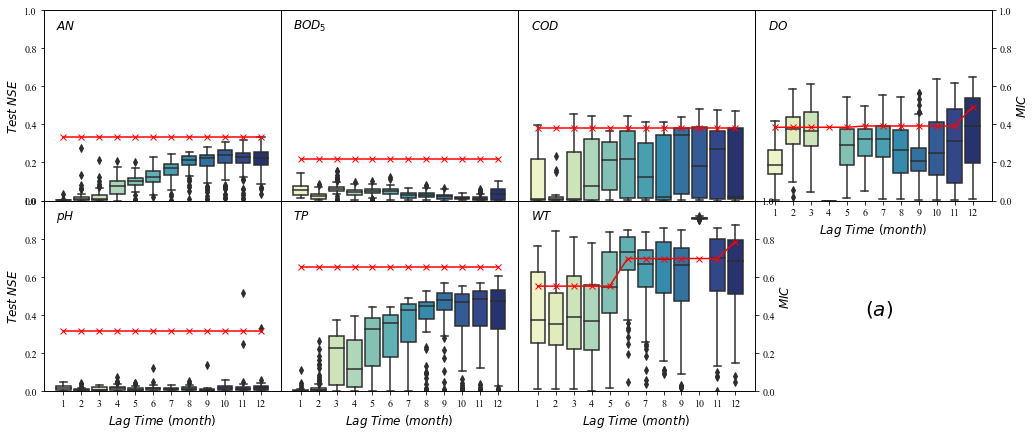

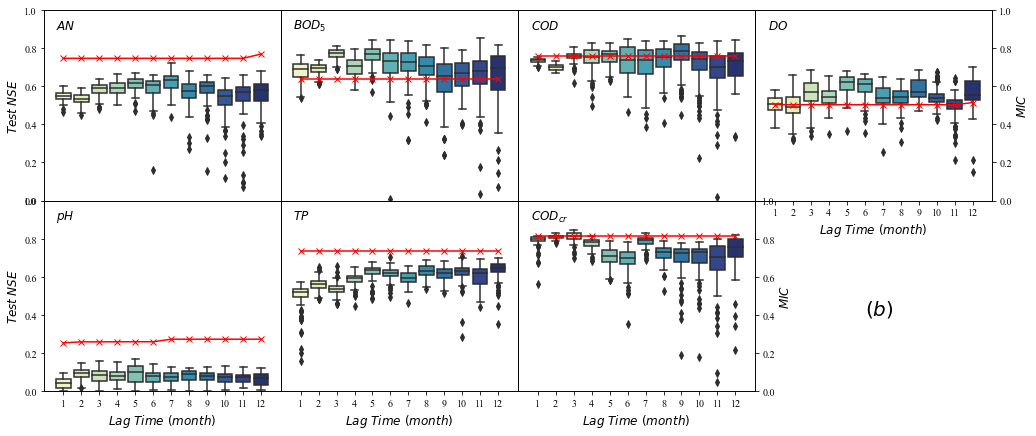

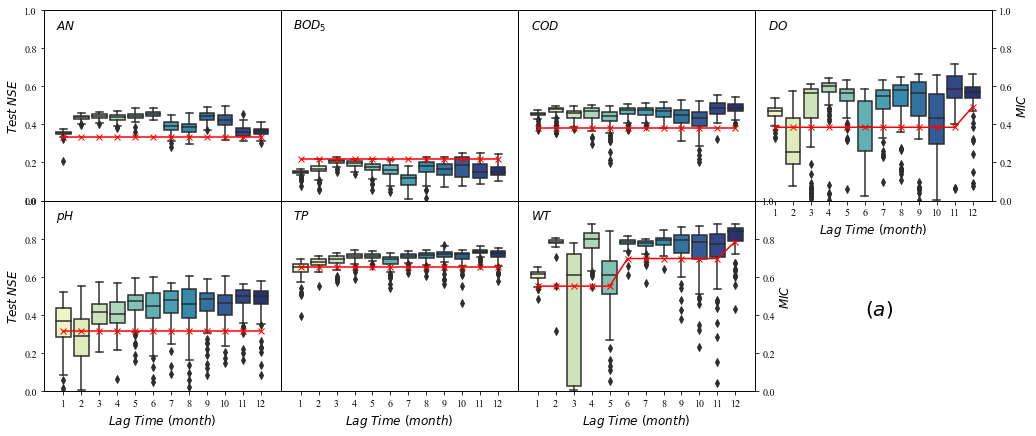

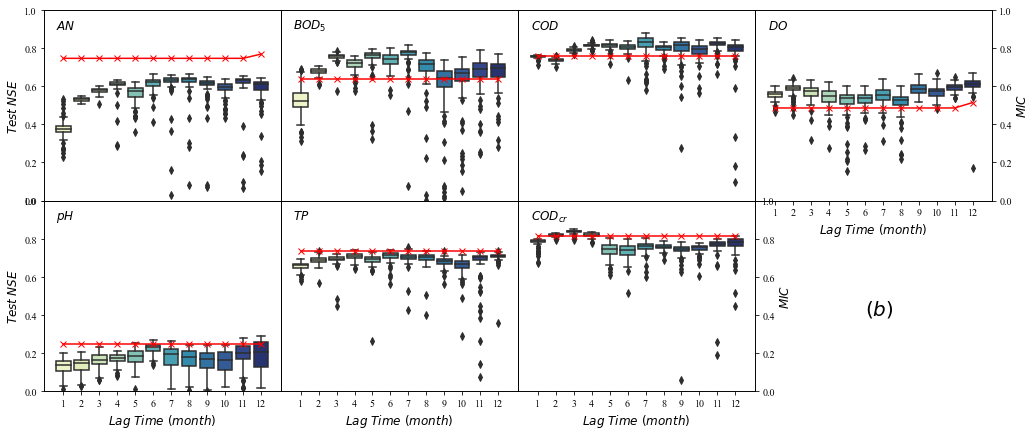

In [3]:
for test in ["a", "c"]:

    for i, region in enumerate(["yichang", "ziya"]):
        plt.rc('font', family='Times New Roman')
        plt.rcParams["font.size"] = 10
        fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 7))
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)

        figure_name = test + "_" + region + ".jpg"
        figure_path = os.path.join("../subbox_7", figure_name)

        data_name = test + "_train_results.csv"
        region_path = os.path.join("../test_2", region)
        data_path = os.path.join(region_path, data_name)
        mic_file_name = "relation_" + region + "_max_" + test + "_7.csv"
        mic_path = os.path.join("../relation_data", mic_file_name)
        raw_data, relation_data = load_data(data_path, mic_path, figure_path)

        metric = "test_nse"
        xlabel = "$Lag\ Time\ (month)$"
        ylabel = "$Test$ $NSE$"
        xticks = [i for i in range(1, 13)]


        raw_data = raw_data.drop(raw_data[raw_data[metric]<0].index)

        location = [[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2]]
        if region == "yichang":
            sub_text = "$(a)$"
            use_cols = ["AN", "BOD", "COD", "DO", "pH", "TP", "WT"]

        else:
            use_cols = ["AN", "BOD", "COD", "DO", "pH", "TP", "CODCR"]
            sub_text = "$(b)$"

        for a, item in enumerate(use_cols):
            r = location[a][0]
            c = location[a][1]
            mic_data = relation_data.loc[item,:].loc[:, ["MIC"]]
            item_data = raw_data[raw_data['output']==item].loc[:, ["time_steps", metric]]
            sns.boxplot(x="time_steps", y=metric, order=[1,2,3,4,5,6,7,8,9,10,11,12], 
                        data=item_data, palette="YlGnBu", ax=axes[r][c], orient="v")

            if item == "CODCR":
                item_text =  "$COD_{cr}$"
            elif item == "BOD":
                item_text = "$BOD_5$"
            else:
                item_text = "$" + item + "$"

            axes[r][c].text(-0.4, 0.9, item_text, fontsize=12)


            axes[r][c].set_ylim(0, 1)

            axes[r][c].set_title("")
            axes[r][c].set_ylabel("")
            axes[r][c].set_xlabel("")


            ax2 = axes[r][c].twinx()
            ax2.plot(mic_data.index-1,mic_data["MIC"], color="red", marker='x')

            ax2.set_ylim(0, 1)
            if r == 0:
                if c in [0, 1, 2]:
                    ax2.set_yticks([])
                else:
                    ax2.set_ylabel("$MIC$", fontsize=12)
            else:
                if c in [0, 1]:
                    ax2.set_yticks([])
                else:
                    ax2.set_ylabel("$MIC$", fontsize=12)

        plt.title("")
        plt.suptitle('')

        axes[1][3].set_visible(False)

        axes[0][0].set_xticks([])
        axes[0][1].set_xticks([])
        axes[0][2].set_xticks([])

        axes[0][1].set_yticks([])
        axes[0][2].set_yticks([])
        axes[0][3].set_yticks([])
        axes[1][1].set_yticks([])
        axes[1][2].set_yticks([])


        axes[0][0].set_ylabel(ylabel, fontsize=12)
        axes[1][0].set_ylabel(ylabel, fontsize=12)

        axes[0][3].set_xlabel(xlabel, fontsize=12)
        axes[1][0].set_xlabel(xlabel, fontsize=12)
        axes[1][1].set_xlabel(xlabel, fontsize=12)
        axes[1][2].set_xlabel(xlabel, fontsize=12)
        axes[1][3].set_xlabel(xlabel, fontsize=12)

        axes[0][3].text(5, -0.6, sub_text, fontsize=20)

        fig.savefig(figure_path, dpi=1000, bbox_inches='tight')